In [1]:
from clusterga.ga import ga
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [2]:
df = pd.read_csv('./data/data.csv', delimiter=';')
df2 = pd.read_csv('./data/data2.csv', delimiter=';')
a = df2['Z-Estimate'].tolist()
df['Z2-Estimate'] = a
df = df[['Z-Estimate', 'Z2-Estimate']]
X = df.values
BBox = ((df2['X-Coordinate'].min(),   df2['X-Coordinate'].max(),      
         df2['Y-Coordinate'].min(), df2['Y-Coordinate'].max()))

## Calinski Harabaz

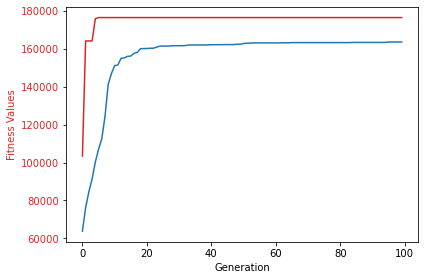

CPU times: user 5min 3s, sys: 14.4 s, total: 5min 17s
Wall time: 53 s


In [3]:
%%time
individual = ga(X,fitness_function="CalinskiHarabaz", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=2 )



In [4]:
individual.chromosome

array([[14.3682018 ,  5.20167511],
       [15.2707855 ,  5.21106479]])

In [5]:
individual.value

176374.12946181203

In [6]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

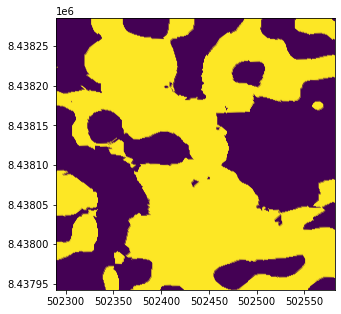

In [7]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

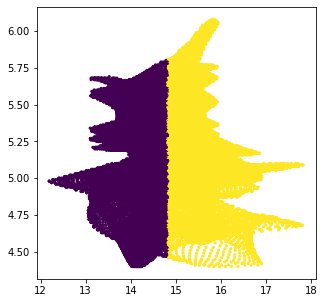

In [8]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [9]:
def describe(X, Y):
    for i in np.unique(Y):
        members_cluster = X[i == Y]
        print("Quandidade de amostras no grupo {}: {}".format(i, members_cluster.shape[0]))
        print("Média do grupo {}: {}".format(i, np.mean(members_cluster, axis=0)))
        print("Variancia do grupo {}: {}".format(i, np.var(members_cluster, axis=0)))
        print()
        print()

In [10]:
describe(X, Y)

Quandidade de amostras no grupo 0: 45699
Média do grupo 0: [14.36938817  5.2013694 ]
Variancia do grupo 0: [0.15708838 0.06538366]


Quandidade de amostras no grupo 1: 55093
Média do grupo 1: [15.27176738  5.21133883]
Variancia do grupo 1: [0.2023748  0.08105151]




## DaviesBouldin

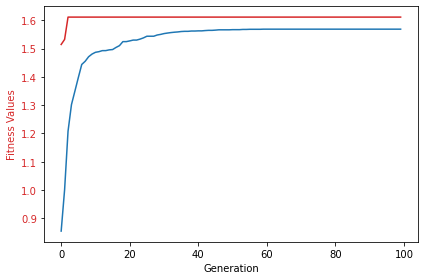

CPU times: user 6min 14s, sys: 17.4 s, total: 6min 31s
Wall time: 1min 5s


In [13]:
%%time
individual = ga(X,fitness_function="DaviesBouldin", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=2 )

In [14]:
individual.chromosome

array([[14.71719489,  5.22336591],
       [15.97339875,  5.08043791]])

In [15]:
individual.value

1.6112232712753904

In [16]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

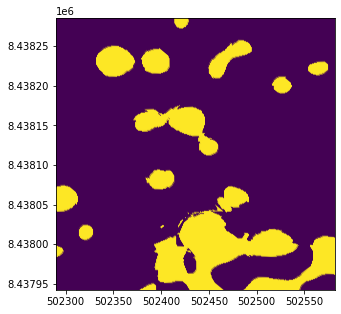

In [17]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

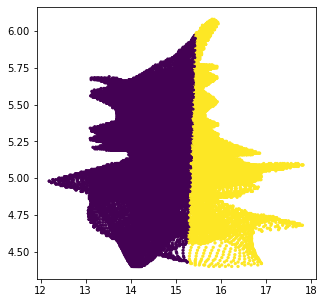

In [18]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [19]:
describe(X, Y)

Quandidade de amostras no grupo 0: 83278
Média do grupo 0: [14.66680576  5.22783977]
Variancia do grupo 0: [0.20338192 0.06816561]


Quandidade de amostras no grupo 1: 17514
Média do grupo 1: [15.79375928  5.10686479]
Variancia do grupo 1: [0.19144889 0.08949114]




## FPC

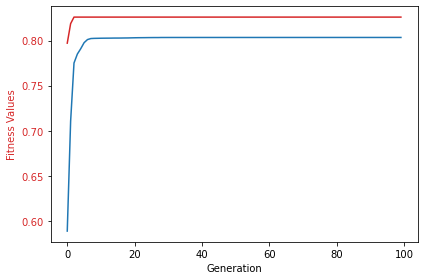

CPU times: user 15min 43s, sys: 45.7 s, total: 16min 29s
Wall time: 2min 45s


In [20]:
%%time
individual = ga(X,fitness_function="FPC", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=20 )

In [21]:
individual.chromosome

array([[15.93412906,  5.04506176],
       [14.70912752,  5.22999183]])

In [22]:
individual.value

0.8261591984304851

In [23]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

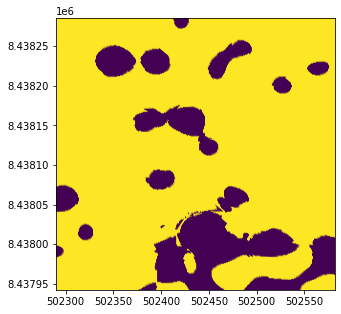

In [25]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

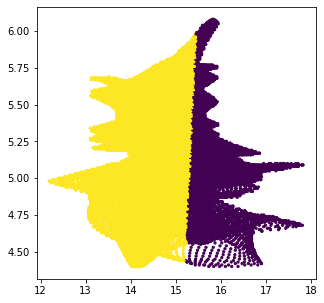

In [26]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [30]:
describe(X, Y)

Quandidade de amostras no grupo 0: 18180
Média do grupo 0: [15.77654015  5.1054934 ]
Variancia do grupo 0: [0.19226283 0.08788523]


Quandidade de amostras no grupo 1: 82612
Média do grupo 1: [14.66150983  5.22911684]
Variancia do grupo 1: [0.20150784 0.06815405]




## SSE

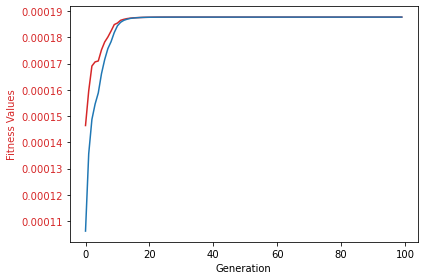

CPU times: user 13min 33s, sys: 34.5 s, total: 14min 7s
Wall time: 2min 21s


In [31]:
%%time
individual = ga(X,fitness_function="SumSquaredError", gen=100, 
                p_crossover=0.5, p_mutation=0.1,selection_operator="Tournament", seed=20 )

In [32]:
individual.chromosome

array([[15.41284959,  5.42299782],
       [15.6557183 ,  4.96745348],
       [14.25176758,  4.81637082],
       [13.49982272,  5.18139637],
       [14.95083093,  5.53032163],
       [16.5510163 ,  4.97516741],
       [14.94179823,  5.19446499],
       [14.16483753,  5.35184014],
       [14.9187096 ,  4.80008474],
       [14.5883186 ,  5.26701018]])

In [33]:
individual.value

0.00018772850085598862

In [34]:
Y = pairwise_distances_argmin(X, individual.chromosome)

(8437942.5, 8438285.5)

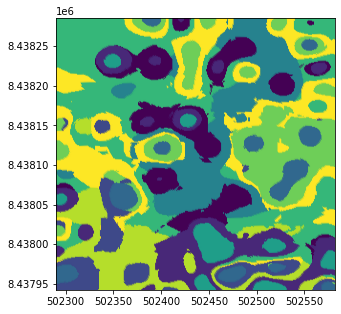

In [35]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(df2['X-Coordinate'], df2['Y-Coordinate'], zorder=1, alpha= 1.0, 
           c=Y, s=5)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

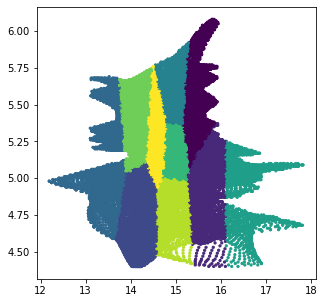

In [36]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X[:, 0], X[:, 1], zorder=1, alpha= 1.0, 
           c=Y, s=5)

In [37]:
describe(X, Y)

Quandidade de amostras no grupo 0: 9647
Média do grupo 0: [15.41284959  5.42299782]
Variancia do grupo 0: [0.02197141 0.05225385]


Quandidade de amostras no grupo 1: 9244
Média do grupo 1: [15.6557183   4.96745348]
Variancia do grupo 1: [0.0463014  0.03258657]


Quandidade de amostras no grupo 2: 5318
Média do grupo 2: [14.25176758  4.81637082]
Variancia do grupo 2: [0.04122121 0.03121312]


Quandidade de amostras no grupo 3: 4569
Média do grupo 3: [13.49982272  5.18139637]
Variancia do grupo 3: [0.06782634 0.07706135]


Quandidade de amostras no grupo 4: 12841
Média do grupo 4: [14.95083093  5.53032163]
Variancia do grupo 4: [0.01541756 0.01099248]


Quandidade de amostras no grupo 5: 3375
Média do grupo 5: [16.5510163   4.97516741]
Variancia do grupo 5: [0.12512706 0.02951801]


Quandidade de amostras no grupo 6: 21093
Média do grupo 6: [14.94179823  5.19446499]
Variancia do grupo 6: [0.01648619 0.01019831]


Quandidade de amostras no grupo 7: 11510
Média do grupo 7: [14.16483753  5